In [ ]:
# dataset @ htttps://finance.yahoo.com/quote/NFLX/history/


In [3]:
import pandas as pd

df = pd.read_csv('NFLX.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5312,2023-06-30,431.100006,444.119995,431.100006,440.489990,440.489990,7342000
5313,2023-07-03,439.760010,441.549988,431.619995,441.440002,441.440002,3733200
5314,2023-07-05,444.910004,450.970001,439.619995,445.899994,445.899994,6869500
5315,2023-07-06,440.000000,442.799988,430.720001,438.839996,438.839996,4938800


In [4]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5312,2023-06-30,440.489990
5313,2023-07-03,441.440002
5314,2023-07-05,445.899994
5315,2023-07-06,438.839996


In [5]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2002-05-23')
datetime_object

datetime.datetime(2002, 5, 23, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5312   2023-06-30
5313   2023-07-03
5314   2023-07-05
5315   2023-07-06
5316   2023-07-07
Name: Date, Length: 5317, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df


,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
...,...
2023-06-30,440.489990
2023-07-03,441.440002
2023-07-05,445.899994


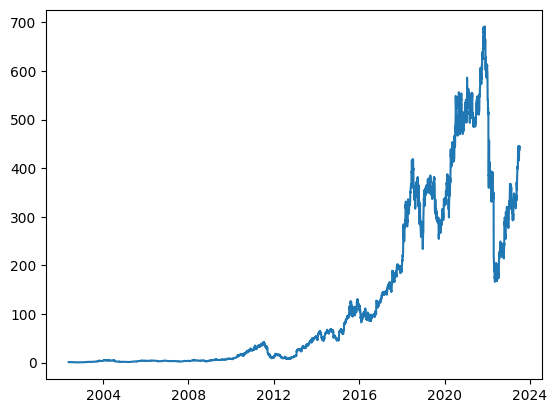

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [32]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-07-11',
                                '2023-06-07',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-07-11,184.059998,189.270004,186.979996,177.339996
1,2022-07-12,189.270004,186.979996,177.339996,174.449997
2,2022-07-13,186.979996,177.339996,174.449997,176.559998
3,2022-07-14,177.339996,174.449997,176.559998,174.779999
4,2022-07-15,174.449997,176.559998,174.779999,189.110001
...,...,...,...,...,...
225,2023-06-01,378.880005,392.980011,395.230011,403.130005
226,2023-06-02,392.980011,395.230011,403.130005,400.470001
227,2023-06-05,395.230011,403.130005,400.470001,403.540009
228,2023-06-06,403.130005,400.470001,403.540009,399.290009


In [33]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((230,), (230, 3, 1), (230,))

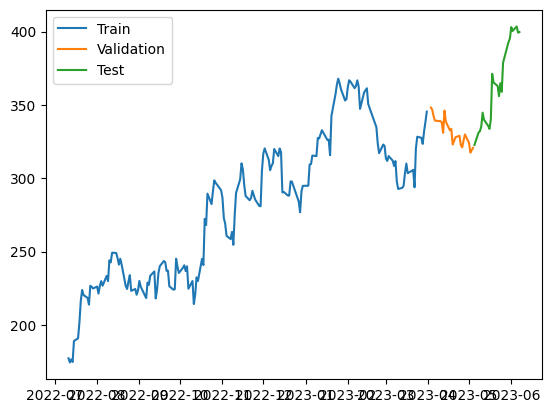

In [34]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 149ms/step - loss: 80351.1484 - mean_absolute_error: 279.2300 - val_loss: 109411.3984 - val_mean_absolute_error: 330.6472
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 80133.4844 - mean_absolute_error: 278.8410 - val_loss: 109150.8047 - val_mean_absolute_error: 330.2529
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 79896.1719 - mean_absolute_error: 278.4178 - val_loss: 108836.8281 - val_mean_absolute_error: 329.7772
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 79610.6328 - mean_absolute_error: 277.9026 - val_loss: 108463.8672 - val_mean_absolute_error: 329.2112
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 79251.0469 - mean_absolute_error: 277.2538 - val_loss: 107966.5234 - val_mean_absolute_error: 328.4549
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 78737.3125 - mean_absolute_error: 276.3217 - val_los

6/6 [==============================] - 1s 3ms/step


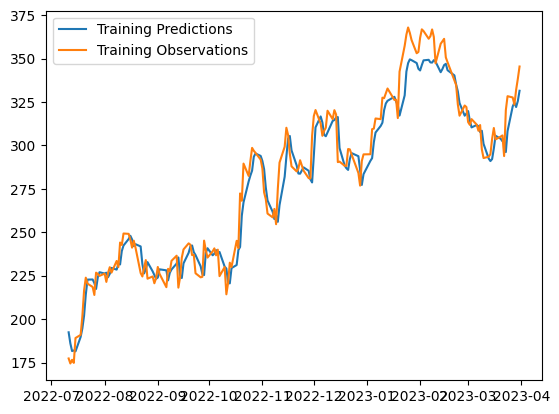

In [36]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


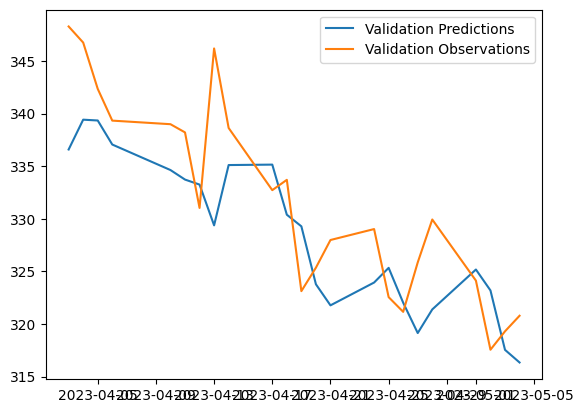

In [37]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


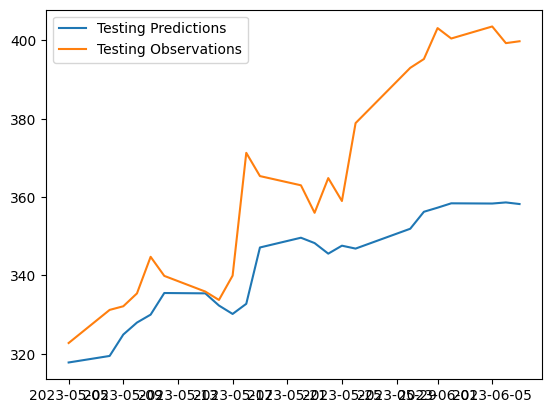

In [38]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

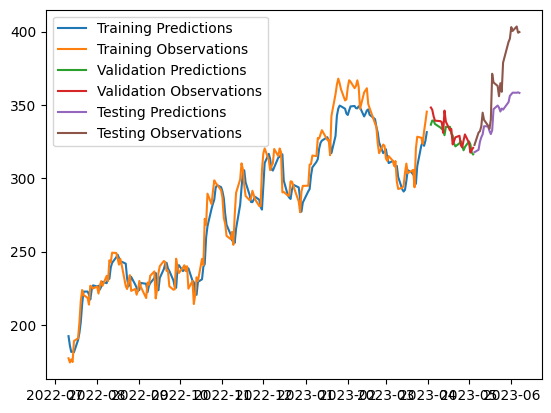

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

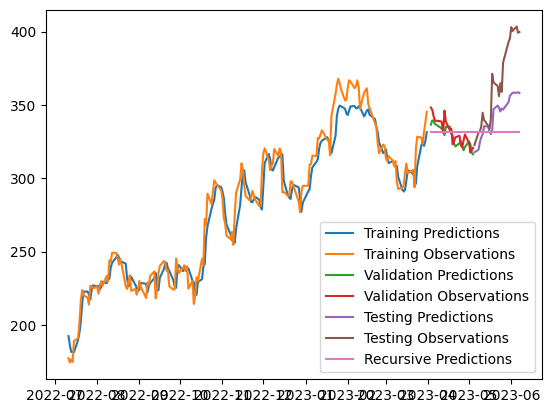

In [42]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])